# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('House_price_dataset.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

c:\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


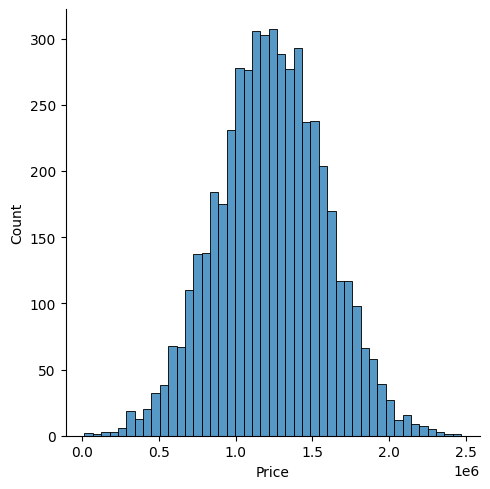

In [5]:
sns.displot(df['Price'])

<Axes: >

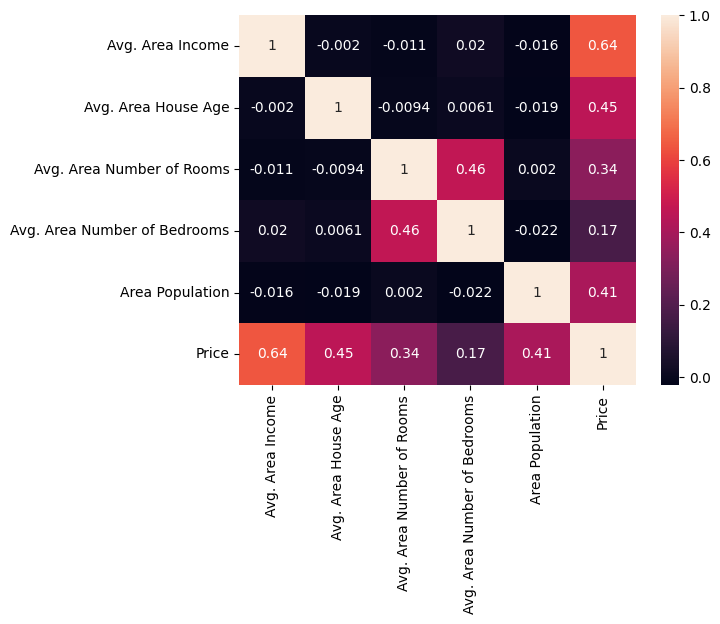

In [6]:
sns.heatmap(df.corr(), annot=True)

# Implementing Linear Regression

In [7]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y = df['Price']

Splitting the dataset into Train data and Test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

# Evaluating the Data

In [10]:
print(lr.intercept_)

-2642239.2512335093


In [11]:
coefficient = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficient

,Coefficient
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


In [12]:
pred = lr.predict(X_test)


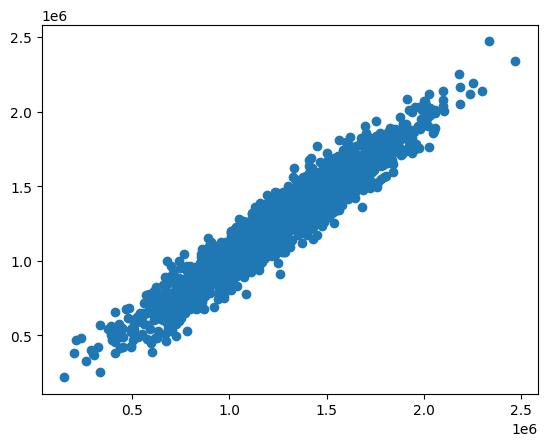

In [13]:
plt.scatter(Y_test, pred)

c:\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


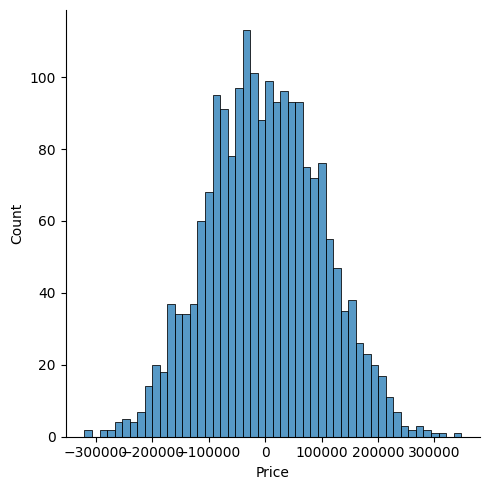

In [14]:
sns.displot((Y_test-pred), bins=50)

In [15]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error:  81331.22699572831
Mean Squared Error:  10119734875.651676
Root Mean Square Error:  100596.89297215732
